# Credit Card Fraud Detection Analysis

This Jupyter Notebook provides a comprehensive analysis of a credit card transactions dataset to detect fraudulent activities. It includes various stages such as data preparation and cleaning, exploratory data analysis (EDA), and machine learning model implementation. In the data preparation phase, we load and explore the dataset, handle missing values and outliers, and scale or normalize the data for model readiness. The EDA phase involves visualizing the distribution of transaction amounts and transaction times to understand their range, central tendency, and variability. We also create a correlation matrix to identify linear relationships between features. The machine learning section covers the implementation and evaluation of several models including Logistic Regression, Random Forest, and Support Vector Machine (SVM). Additionally, we visualize feature distributions by class using boxplots and pie charts. This structured approach ensures a thorough analysis and effective model building for detecting fraudulent credit card transactions.


## Importing Necessary Libraries

In this section, we will import the necessary libraries required for data manipulation, visualization, and building machine learning models.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Load the dataset

In [2]:
#  Load and Inspect the Data
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

In [3]:
data.shape

(284807, 31)

# Display the first few rows of the dataset

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Display basic statistics of the dataset


# Check for Empty Columns

In [5]:

empty_columns = data.columns[data.isnull().all()]
print(f"Empty Columns: {empty_columns}")


Empty Columns: Index([], dtype='object')


# Check for missing values in the dataset

In [6]:
# Check for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:

print("Statistical summary of the dataset:\n", data.describe())




Statistical summary of the dataset:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std  

# Rename Columns

In [9]:


new_column_names = {
    'Time': 'Transaction_Time',
    'V1': 'Feature1',
    'V2': 'Feature2',
    'V3': 'Feature3',
    'V4': 'Feature4',
    'V5': 'Feature5',
    'V6': 'Feature6',
    'V7': 'Feature7',
    'V8': 'Feature8',
    'V9': 'Feature9',
    'V10': 'Feature10',
    'V11': 'Feature11',
    'V12': 'Feature12',
    'V13': 'Feature13',
    'V14': 'Feature14',
    'V15': 'Feature15',
    'V16': 'Feature16',
    'V17': 'Feature17',
    'V18': 'Feature18',
    'V19': 'Feature19',
    'V20': 'Feature20',
    'V21': 'Feature21',
    'V22': 'Feature22',
    'V23': 'Feature23',
    'V24': 'Feature24',
    'V25': 'Feature25',
    'V26': 'Feature26',
    'V27': 'Feature27',
    'V28': 'Feature28',
    'Amount': 'Transaction_Amount',
    'Class': 'Fraud_Label'
}

data.rename(columns=new_column_names, inplace=True)



In [10]:
data.head()

,Transaction_Time,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Transaction_Amount,Fraud_Label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Checking the Distribution of the Target Variable

In this section, we will check the distribution of the target variable (`Fraud_Label`) to understand the balance between the classes (fraudulent and non-fraudulent transactions).


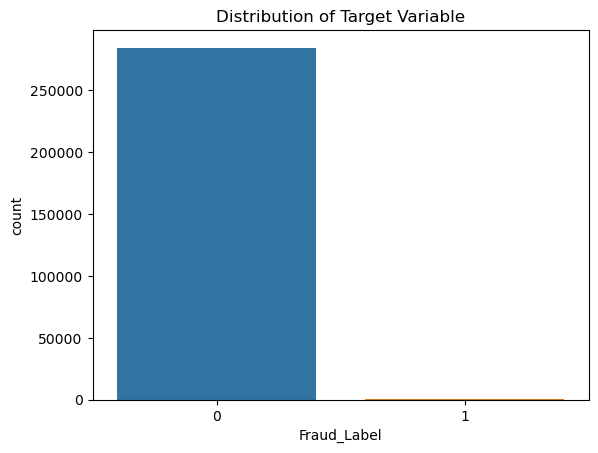

In [11]:
# Check the distribution of the target variable 
sns.countplot(x='Fraud_Label', data=data)
plt.title('Distribution of Target Variable')
plt.show()



## Correlation Matrix Analysis

Understanding the relationships between different features in the dataset is crucial for data analysis and modeling. A correlation matrix helps in identifying the linear relationships between pairs of features. In this section, we will create a correlation matrix and visualize it using a heatmap.

The correlation matrix provides insight into the following:
- **Positive Correlation**: A higher value of one feature is associated with a higher value of another feature.
- **Negative Correlation**: A higher value of one feature is associated with a lower value of another feature.
- **No Correlation**: No linear relationship between the features.

By visualizing the correlation matrix, we can easily spot strong positive and negative correlations, which can help in feature selection and understanding the underlying structure of the data.

The heatmap below displays the correlation matrix for our dataset:


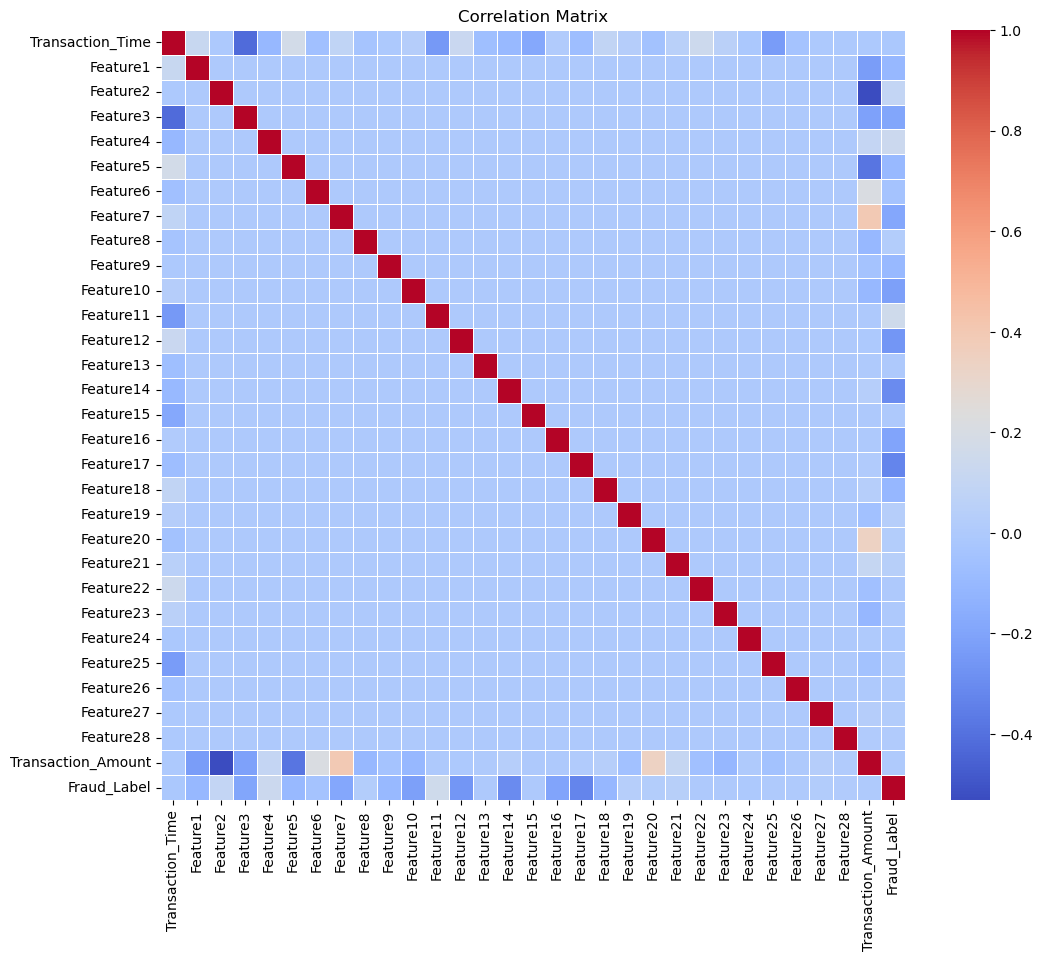

In [12]:

# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



## Distribution of Transaction Amounts

Analyzing the distribution of transaction amounts helps us understand the range, central tendency, and variability of the amounts in the dataset. By visualizing the distribution, we can identify patterns, such as common transaction amounts, and detect any anomalies or outliers.

The histogram and kernel density estimate (KDE) plot below illustrate the distribution of transaction amounts in the dataset:


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


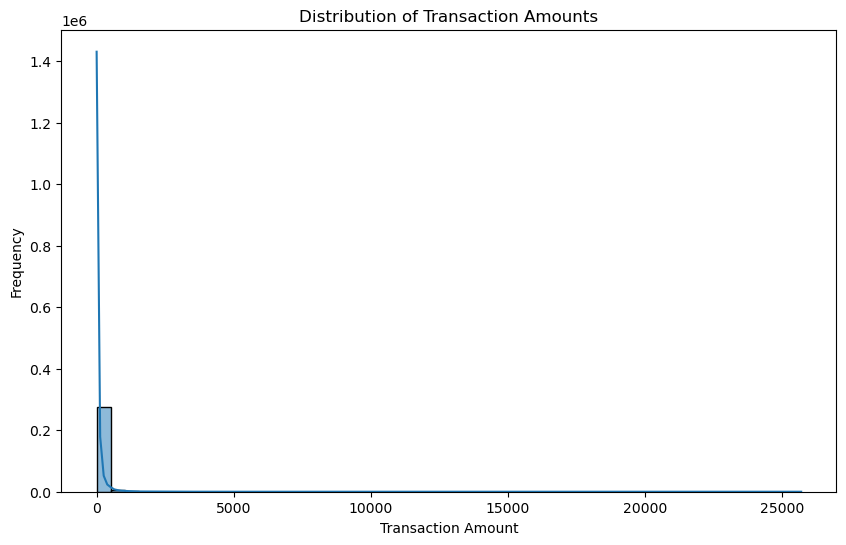

In [13]:


# Distribution of the 'Amount' Column
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [14]:
data['Transaction_Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Transaction_Amount, dtype: float64

In [15]:
data['Transaction_Amount'].max()

25691.16

## Distribution of Transaction Time

Examining the distribution of transaction times allows us to understand when transactions are most frequent. This can reveal patterns such as peak transaction periods and help identify any unusual activity that occurs at specific times.

The histogram and kernel density estimate (KDE) plot below show the distribution of transaction times in the dataset:


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


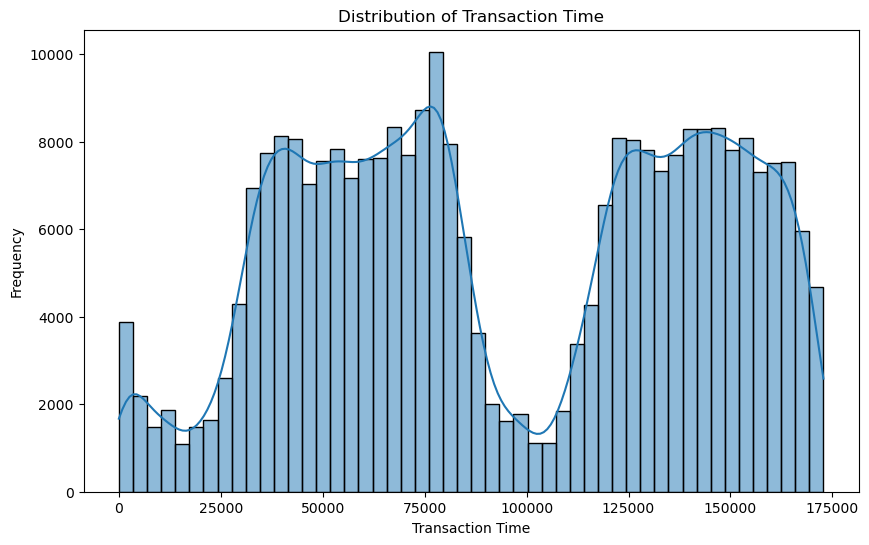

In [16]:
# Distribution of the 'Transaction_Time' Column
plt.figure(figsize=(10, 6))
sns.histplot(data['Transaction_Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.show()


In [17]:
data['Transaction_Time'].tail()

284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Transaction_Time, dtype: float64

# Machine Learning Models

In [18]:
#  Preparing for Machine Learning Models
X = data.drop(columns=['Fraud_Label'])
y = data['Fraud_Label']

In [19]:
print("shape of x :" ,X.shape)
print("shape of y :" ,y.shape)

shape of x : (284807, 30)
shape of y : (284807,)



# Split the dataset into training and testing sets

In [20]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Standardize features
scaler = StandardScaler()
X[['Transaction_Amount', 'Transaction_Time']] = scaler.fit_transform(X[['Transaction_Amount', 'Transaction_Time']])


# KNN model

In [23]:
# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)


In [24]:
# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

In [25]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[85285    10]
 [   40   108]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.73      0.81       148

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443


Accuracy Score:
0.9994148145547324


 # Linear Regression

Linear Regression Mean Squared Error: 0.0008929331086068627
Linear Regression R^2 Score: 0.4835995472530631


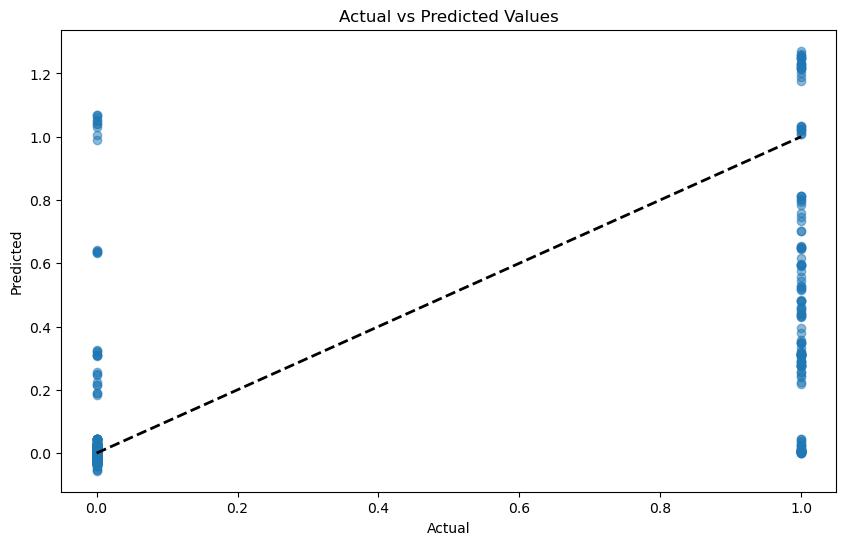

In [26]:


# Applying Machine Learning Models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin_reg = lin_reg.predict(X_test)

# Evaluate the model
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lin_reg))
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lin_reg))

#  plot the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin_reg, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


# Logistic Regression

In [27]:
#  Applying Machine Learning Models

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.83      0.59      0.69       148

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9238114778122986


# Random Forest

In [28]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9307394606635477


# Decision Tree

In [29]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.78      0.74      0.76       148

    accuracy                           1.00     85443
   macro avg       0.89      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8680615209851976


# Support Vector Machine (SVM)

In [30]:

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, svm.predict_proba(X_test)[:,1]))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.64      0.34      0.44       148

    accuracy                           1.00     85443
   macro avg       0.82      0.67      0.72     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.7704403477279965


# Visualizing Feature Distributions by Class

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#  Load and Inspect the Data
file_path = 'creditcard.csv'
data = pd.read_csv(file_path)

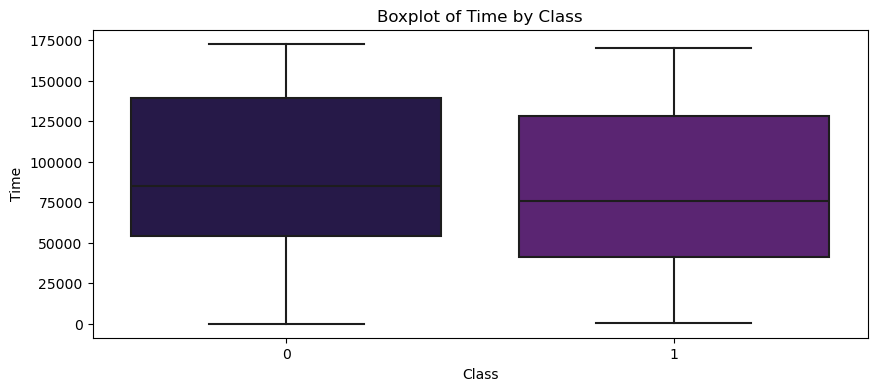

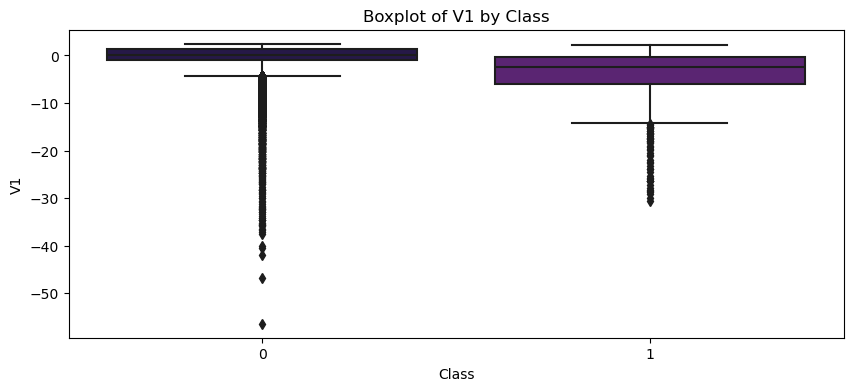

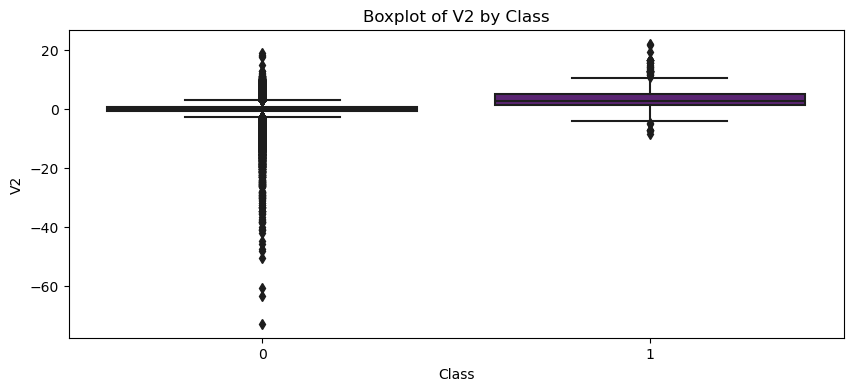

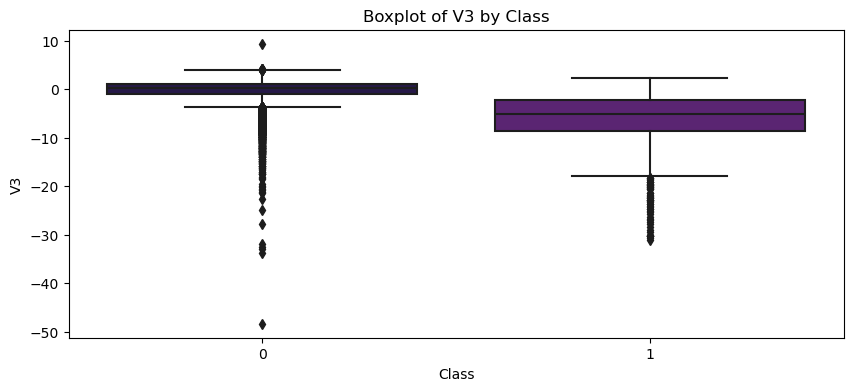

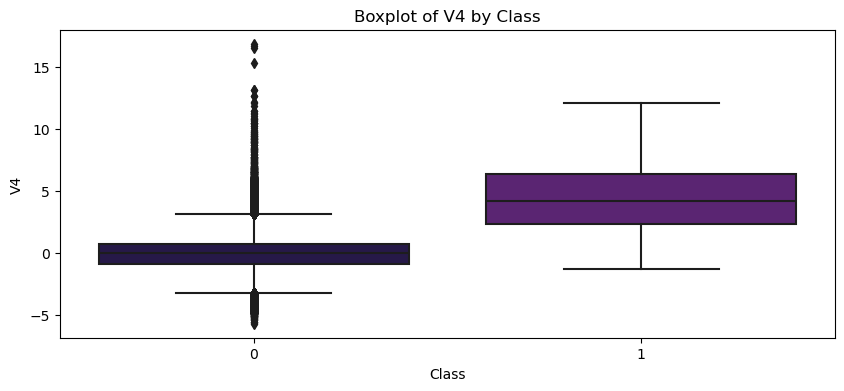

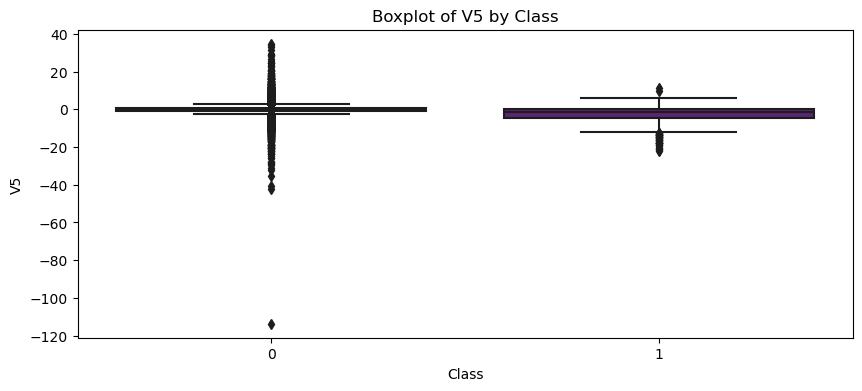

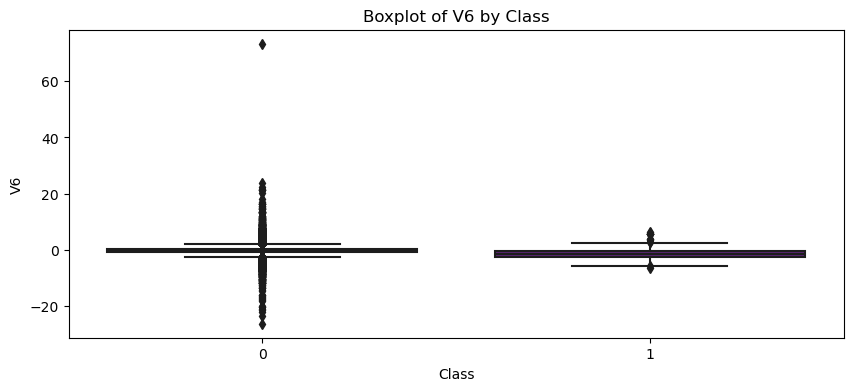

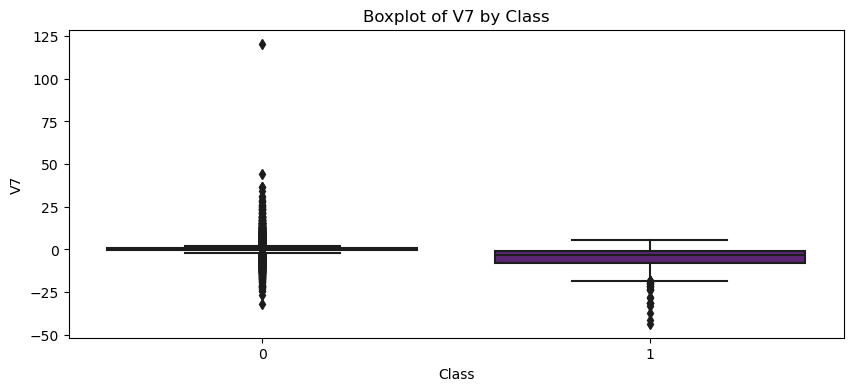

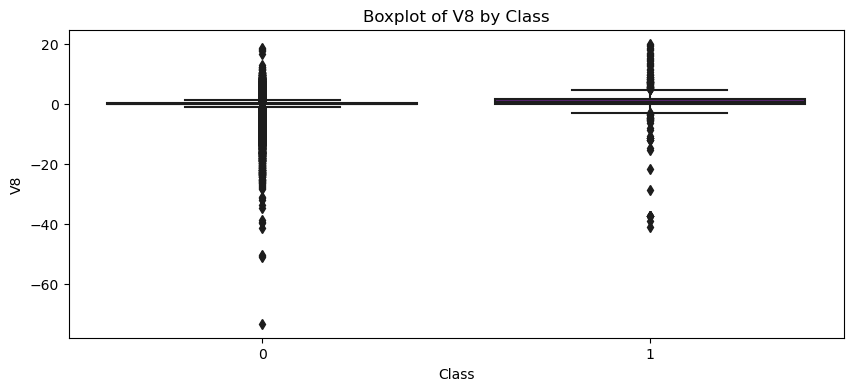

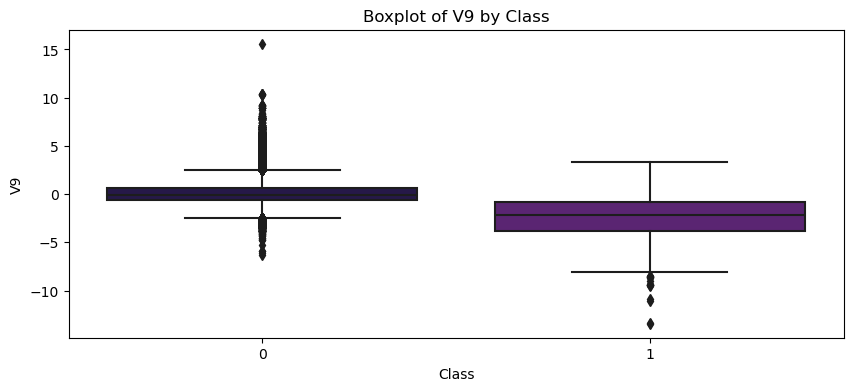

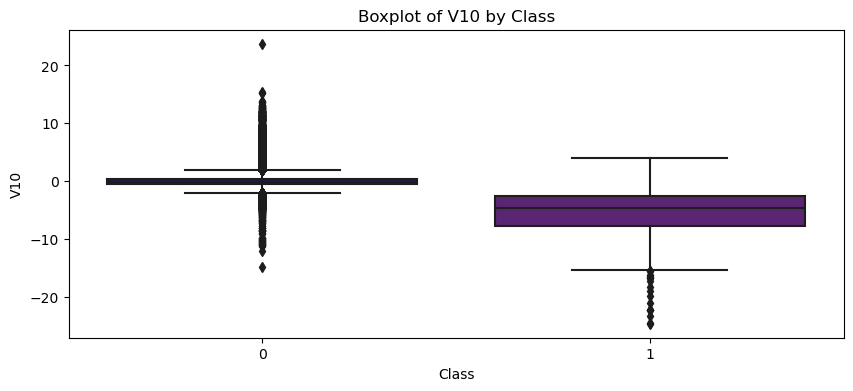

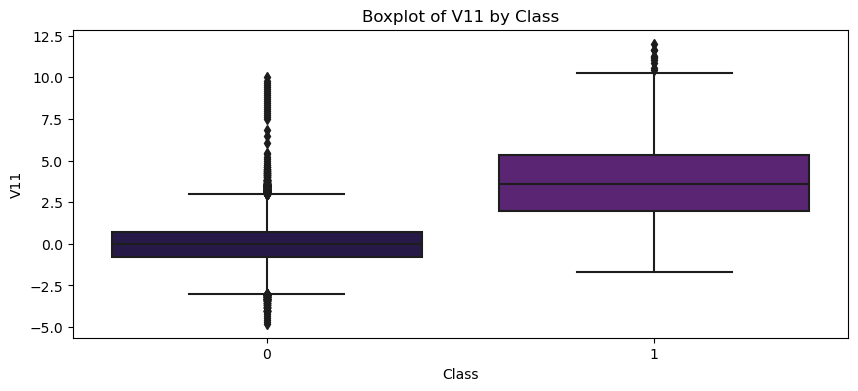

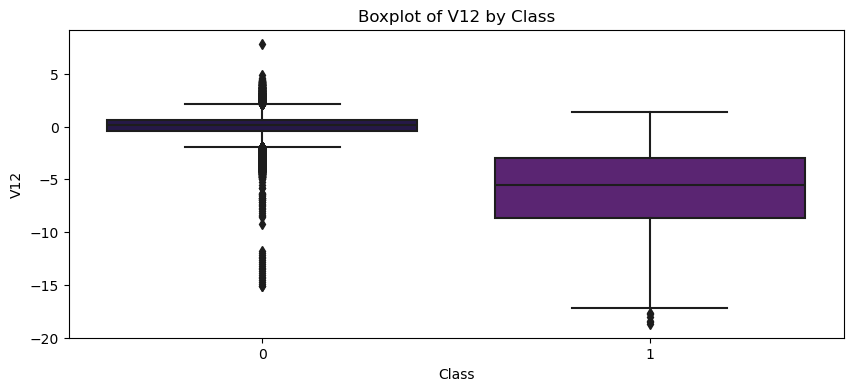

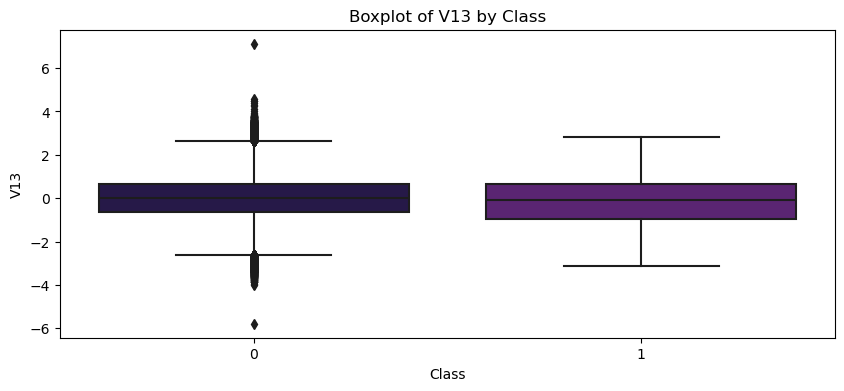

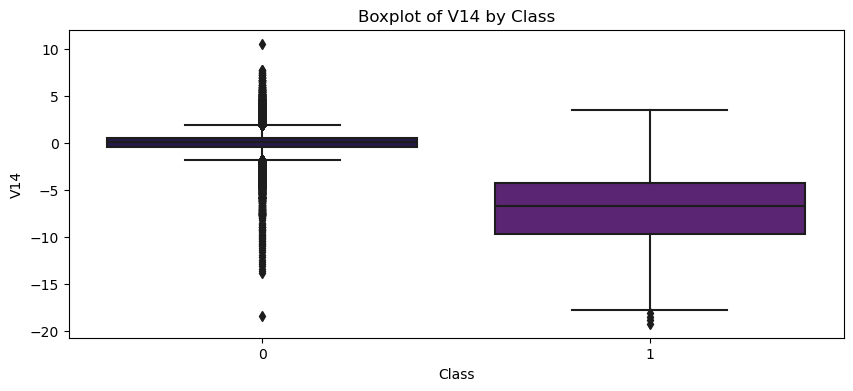

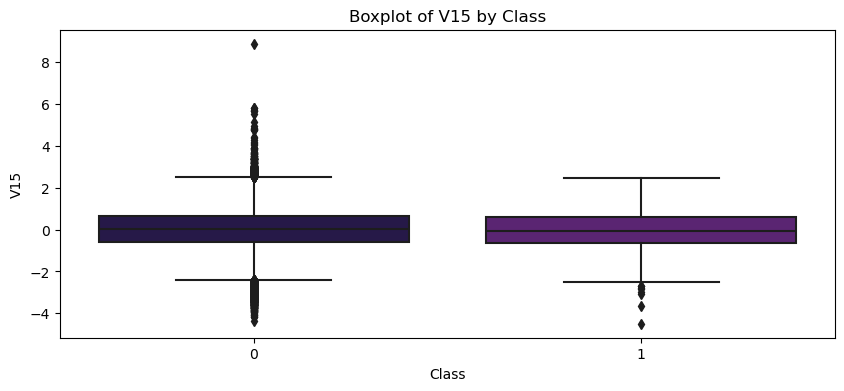

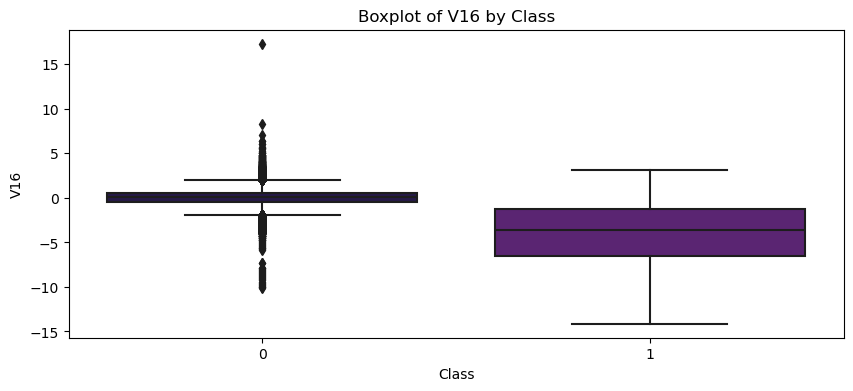

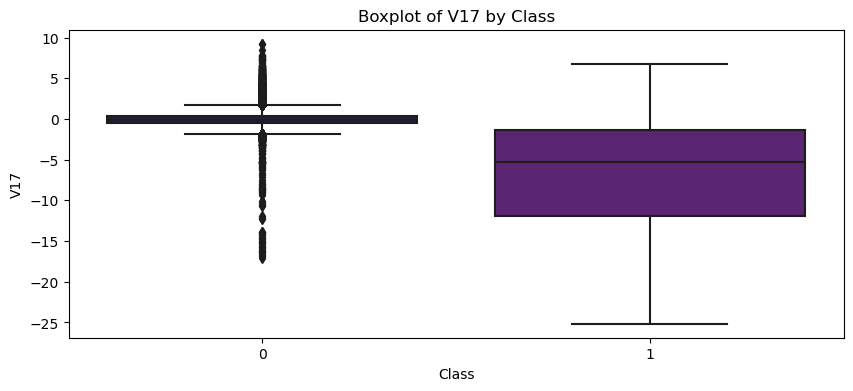

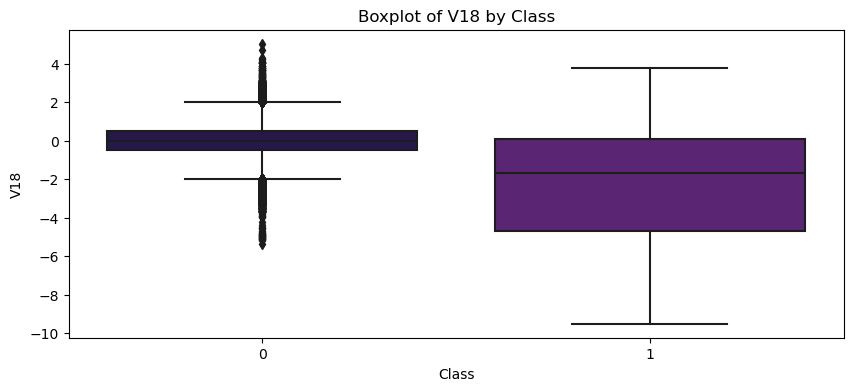

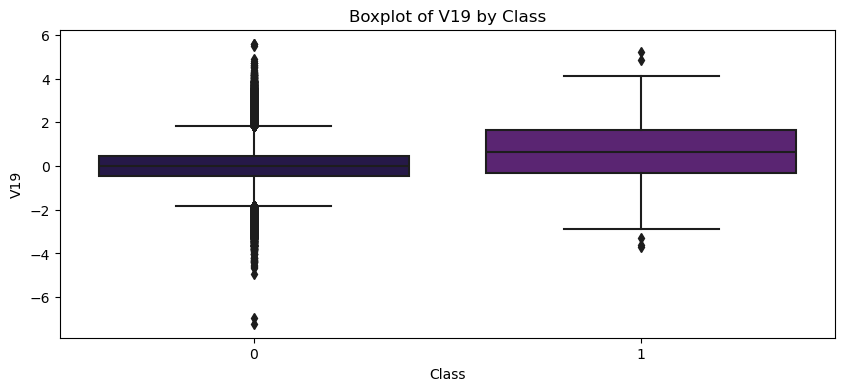

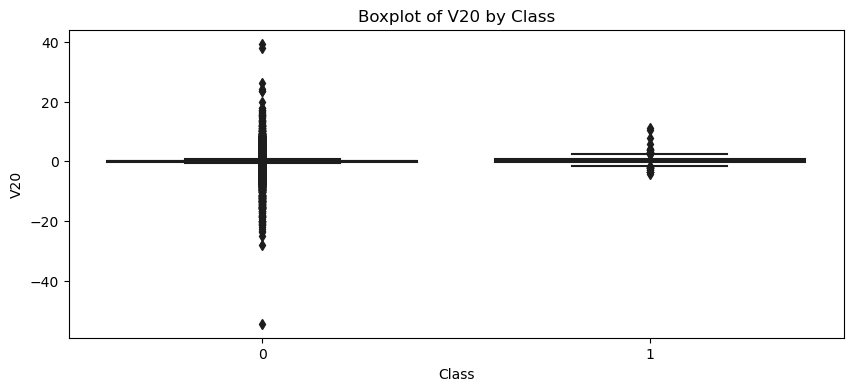

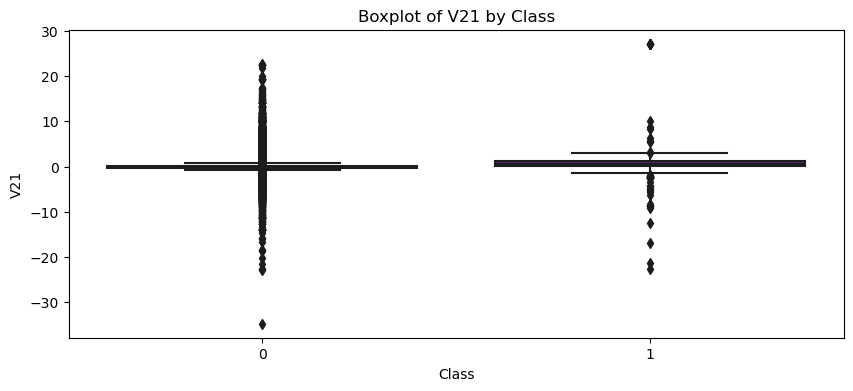

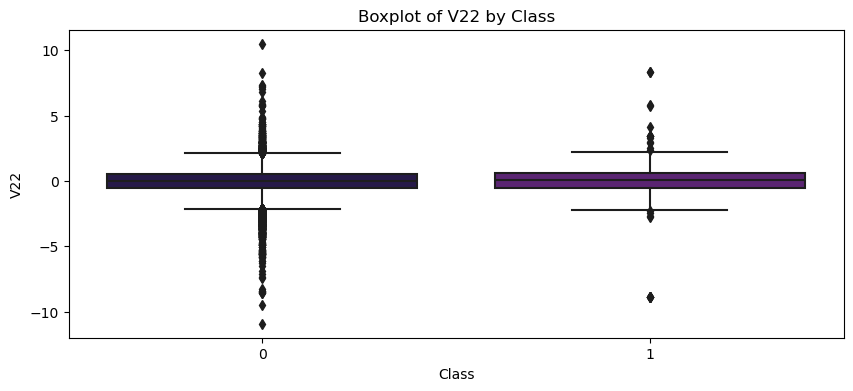

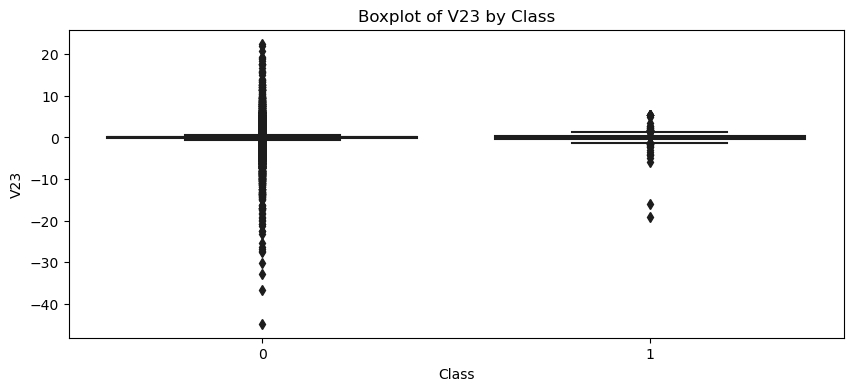

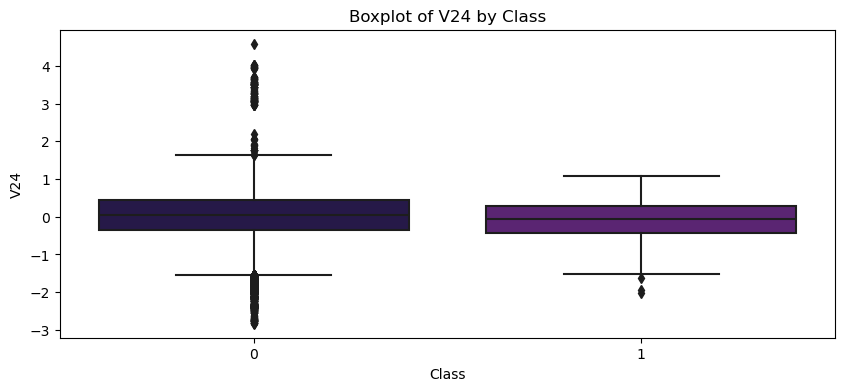

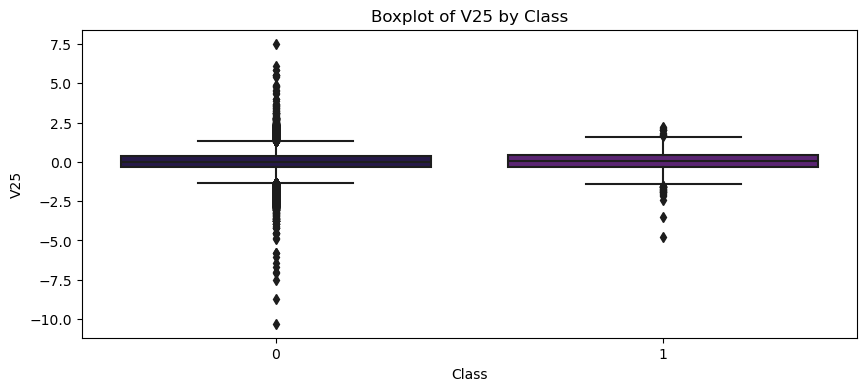

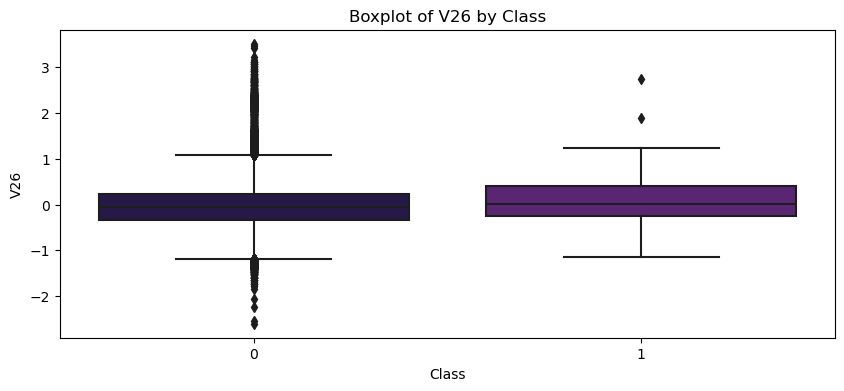

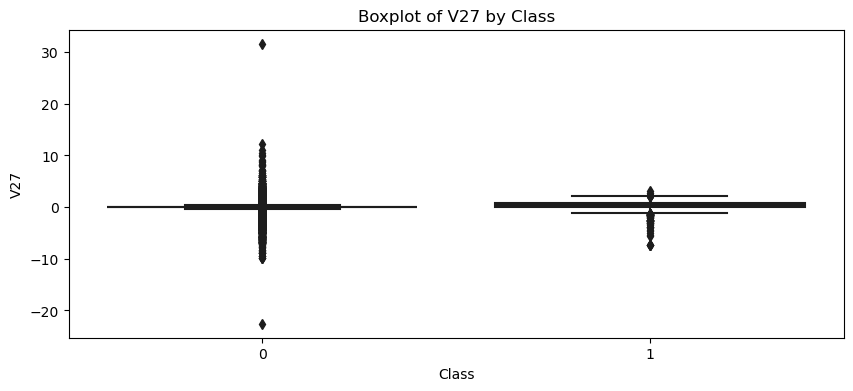

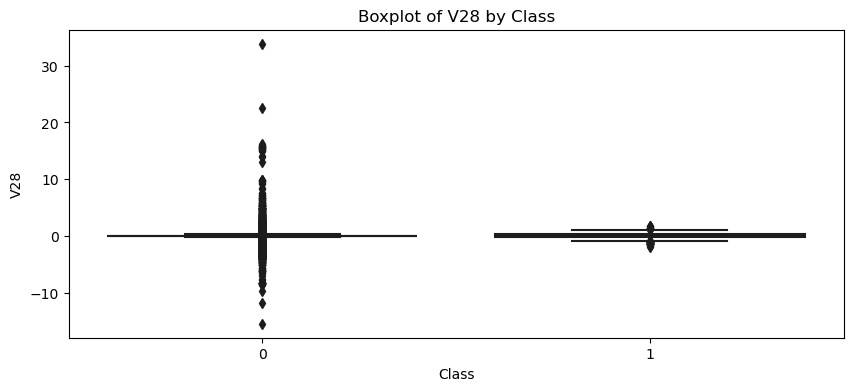

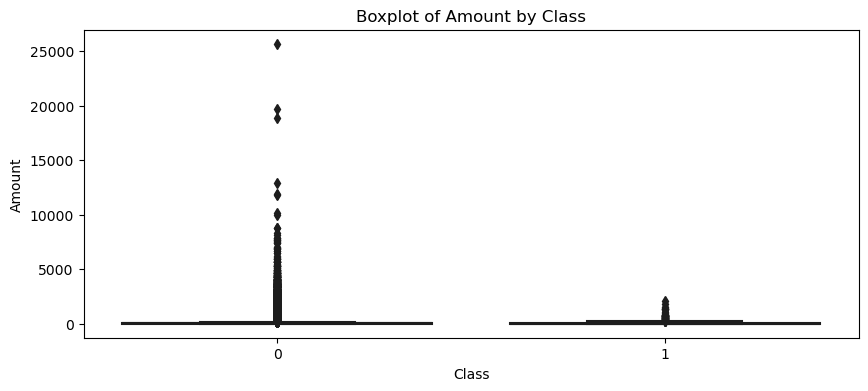

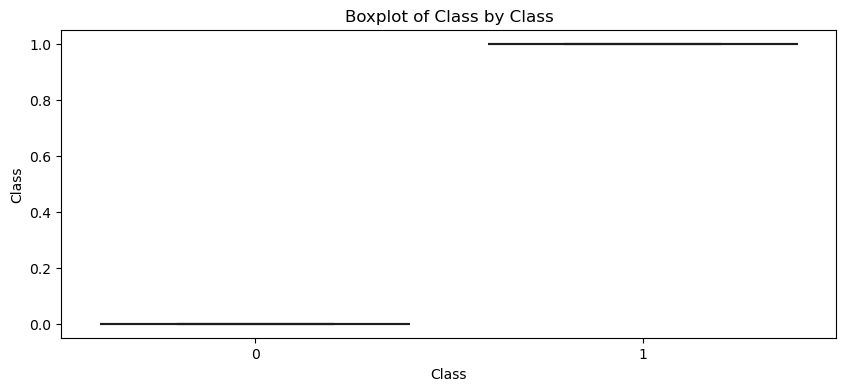

In [18]:
columns = data.columns.to_list()
palette = sns.color_palette("magma")

# Example of creating subplots for boxplots
for column in columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Class', y=column, data=data, palette=palette)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()
